In [49]:
!pip install scipy

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
data = pd.read_csv("task1.1.csv")

In [6]:
data.head()

,Year,Week,SEB Sales (C.U.),Client Sales (C.U.),Category_Code
0,2019,1,2113,12044,1
1,2020,1,3728,16436,1
2,2019,1,216,663,2
3,2020,1,420,1059,2
4,2019,2,2576,13772,1


In [76]:
data.shape

(158, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 158 non-null    int64
 1   Week                 158 non-null    int64
 2   SEB Sales (C.U.)     158 non-null    int64
 3   Client Sales (C.U.)  158 non-null    int64
 4   Category_Code        158 non-null    int64
dtypes: int64(5)
memory usage: 6.3 KB


In [8]:
data.describe()

,Year,Week,SEB Sales (C.U.),Client Sales (C.U.),Category_Code
count,158.000000,158.000000,158.000000,158.000000,158.00000
mean,2019.341772,22.227848,2032.018987,8978.335443,1.50000
std,0.475812,14.333560,2304.365142,10455.605405,0.50159
min,2019.000000,1.000000,153.000000,449.000000,1.00000
25%,2019.000000,10.250000,352.750000,962.250000,1.00000
50%,2019.000000,20.000000,1328.000000,7445.000000,1.50000
75%,2020.000000,32.750000,2691.000000,12649.500000,2.00000
max,2020.000000,52.000000,16639.000000,68795.000000,2.00000


# Data Analys
## Split data on year and categories

In [92]:
data_year_2019 = data[data['Year'] == 2019]
data_year_2020 = data[data['Year'] == 2020]

In [93]:
data_year_2019_cat_1 = data_year_2019[data_year_2019['Category_Code'] == 1]
data_year_2019_cat_2 = data_year_2019[data_year_2019['Category_Code'] == 2]

In [94]:
data_year_2020_cat_1 = data_year_2020[data_year_2020['Category_Code'] == 1]
data_year_2020_cat_2 = data_year_2020[data_year_2020['Category_Code'] == 2]

In [298]:
def draw_plot(figure, x, y, year, category, i):
    ax = figure.add_subplot(2, 2, i)
    ax.grid()
    ax.set_xlabel('Week')
    ax.set_ylabel('C.U.')
    ax.title.set_text(f'Sales {category} catеgory for {year} year')
    ax.plot(x, y, label=f'Distribution')

In [299]:
def draw_hist(figure, x, year, category, i):
    mn = x.mean()
    mead = x.median()
    ax = figure.add_subplot(2, 2, i)
    ax.grid()
    ax.set_xlabel('C.U.')
    ax.set_ylabel('Frequency')
    ax.title.set_text(f'Sales {category} catеgory for {year} year')
    ax.hist(x, label=f'Distribution')
    ax.vlines(mn, 0, 20, color="red", label=f"{round(mn, 2)} - Expected value")
    ax.vlines(mead, 0, 20, color="green", label=f"{round(mead, 2)} - Median")
    ax.legend()

## Draw charts
### Sales 1 and 2 categories for 2019 year

In [300]:
data_sales = [data_year_2019_cat_1, data_year_2020_cat_1, data_year_2019_cat_2, data_year_2020_cat_2]

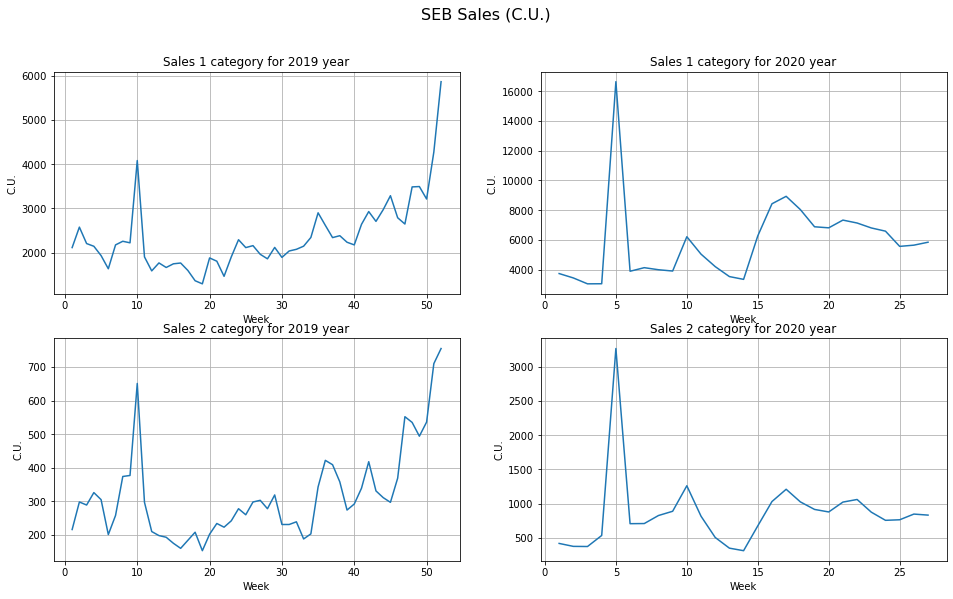

In [301]:
figure = plt.figure(figsize=(16, 9))
figure.suptitle('SEB Sales (C.U.)', fontsize=16)
all_years = [2019, 2020]
categories = [1, 1, 2, 2]
for i in range(len(data_sales)):
    data_seb = data_seb_sales[i]
    x = data_seb['Week']
    y = data_seb['SEB Sales (C.U.)']
    year = all_years[i%2]
    draw_plot(figure, x, y, year, categories[i], i+1)

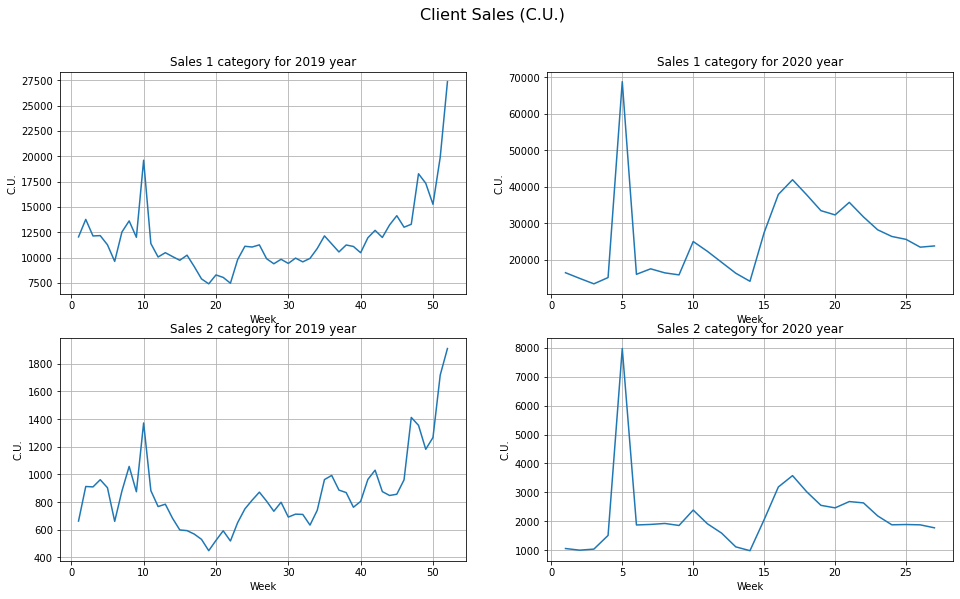

In [302]:
figure = plt.figure(figsize=(16, 9))
figure.suptitle('Client Sales (C.U.)', fontsize=16)
all_years = [2019, 2020]
categories = [1, 1, 2, 2]
for i in range(len(data_sales)):
    data_seb = data_seb_sales[i]
    x = data_seb['Week']
    y = data_seb['Client Sales (C.U.)']
    year = all_years[i%2]
    draw_plot(figure, x, y, year, categories[i], i+1)

The number of units sold in 2020 is much higher than in 2019, which is in the first and second categories. Let's look at the distribution of prices by years and categories.

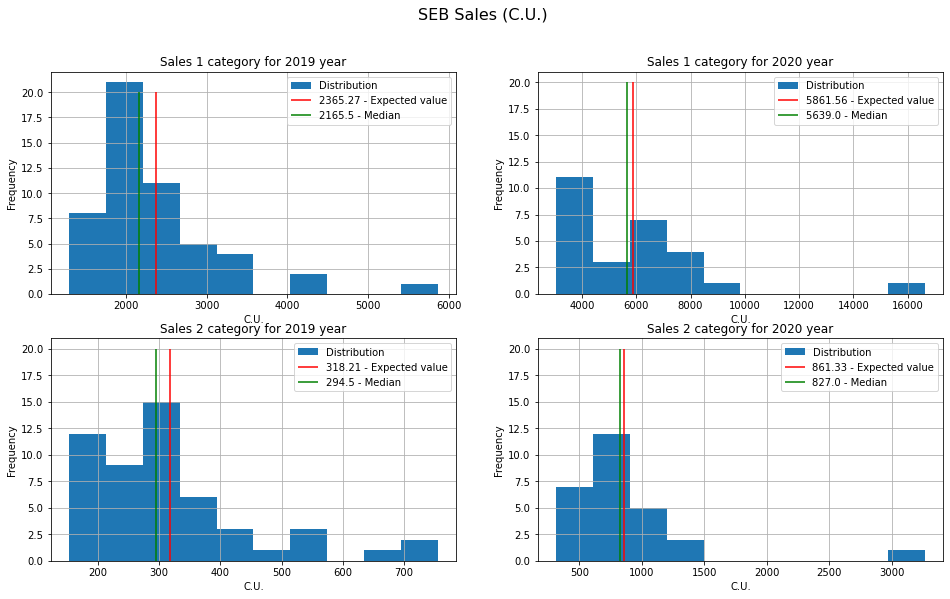

In [303]:
figure = plt.figure(figsize=(16, 9))
figure.suptitle('SEB Sales (C.U.)', fontsize=16)

all_years = [2019, 2020]
categories = [1, 1, 2, 2]
for i in range(len(data_sales)):
    data_seb = data_seb_sales[i]
    x = data_seb['SEB Sales (C.U.)']
    year = all_years[i%2]
    draw_hist(figure, x, year, categories[i], i+1)

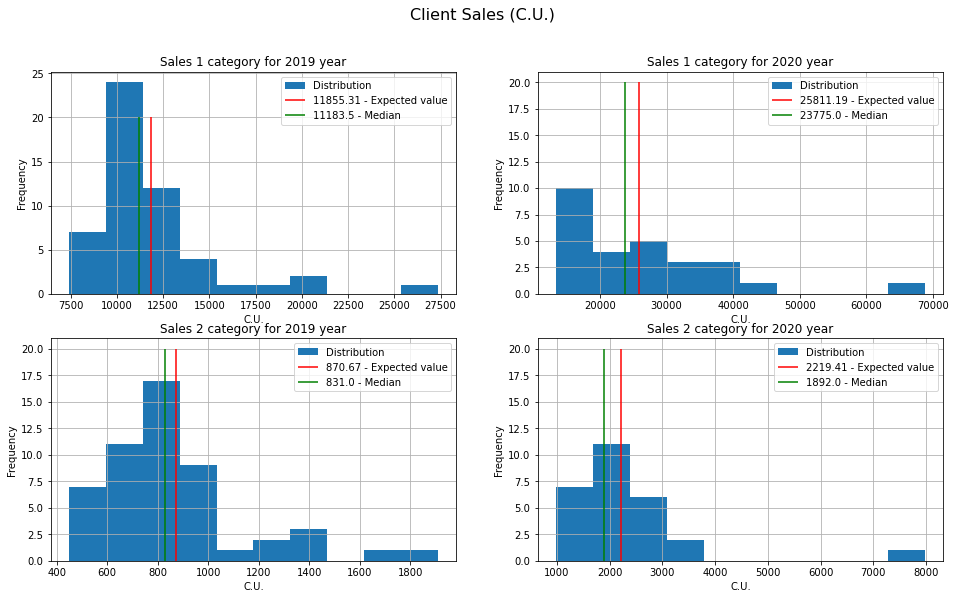

In [310]:
figure = plt.figure(figsize=(16, 9))
figure.suptitle('Client Sales (C.U.)', fontsize=16)

all_years = [2019, 2020]
categories = [1, 1, 2, 2]
for i in range(len(data_sales)):
    data_seb = data_seb_sales[i]
    x = data_seb['Client Sales (C.U.)']
    year = all_years[i%2]
    draw_hist(figure, x, year, categories[i], i+1)

Judging by the median and mat. expected, the number of units of goods sold at the beginning of 2020, more than in 2019

You can also tell this by subtracting Client Sales and SEB Sales and looking at their checkmate. expectation and median. You can also notice that the 2nd category is sold less than the first category. Let's look at the correlation

<AxesSubplot:>

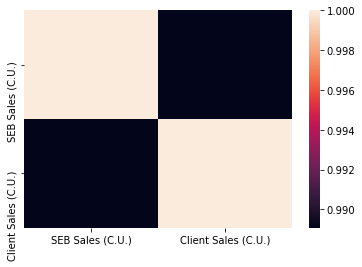

In [305]:
data_sales = data[["SEB Sales (C.U.)", "Client Sales (C.U.)"]]
sns.heatmap(data_sales.corr())

You can see a clear correlation between Client Sales and SEB Sales

In [307]:
data_sales = [data_year_2019_cat_1, data_year_2020_cat_1, data_year_2019_cat_2, data_year_2020_cat_2]
data_cat_1 = data[data['Category_Code'] == 1]
df = data.copy()
df_group = data.groupby(["Category_Code", "Year"]).agg({'SEB Sales (C.U.)':"median"})

In [312]:
vl_median = df_group.values
print(f"The median of 2020 of the 1st category differs from the median of 2019 of the 1st category by {round(float(vl_median[1]/vl_median[0]), 2)} times")
print(f"The 2020 tier 2 median differs from the 2019 tier 2 median by  {round(float(vl_median[3]/vl_median[2]), 2)} times")
print(f"The median of 2019 Category 1 differs from the median of 2019 Category 2 by {round(float(vl_median[0]/vl_median[2]), 2)} times")
print(f"The 2020 tier 1 median differs from the 2020 tier 2 median by {round(float(vl_median[1]/vl_median[3]), 2)} times")

The median of 2020 of the 1st category differs from the median of 2019 of the 1st category by 2.6 times
The 2020 tier 2 median differs from the 2019 tier 2 median by  2.81 times
The median of 2019 Category 1 differs from the median of 2019 Category 2 by 7.35 times
The 2020 tier 1 median differs from the 2020 tier 2 median by 6.82 times


In [309]:
data.head()

,Year,Week,SEB Sales (C.U.),Client Sales (C.U.),Category_Code
0,2019,1,2113,12044,1
1,2020,1,3728,16436,1
2,2019,1,216,663,2
3,2020,1,420,1059,2
4,2019,2,2576,13772,1


In [281]:
# function for build pie - analys flag count

def build_pie(figure, i, vals, labels):
  colors = sns.color_palette('pastel')[0:5]
  exp = (0.1, 0.0)
  ax = figure.add_subplot(1, 2, i+1)
  ax.pie(vals, labels=labels, autopct="%.2f", explode=exp, shadow = True, colors=colors)

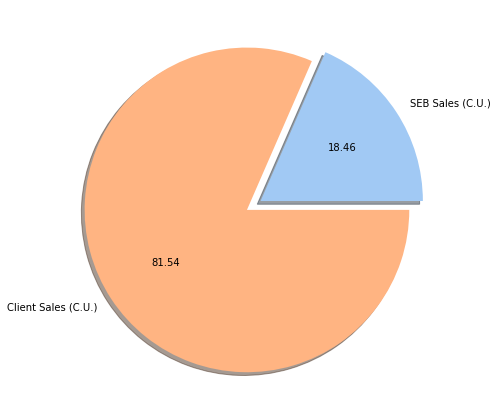

In [282]:
figure = plt.figure(figsize=(16, 9))

vals = [sum(data['SEB Sales (C.U.)']), sum(data['Client Sales (C.U.)'])]
labels = ['SEB Sales (C.U.)', 'Client Sales (C.U.)']
build_pie(figure, 0, vals, labels)

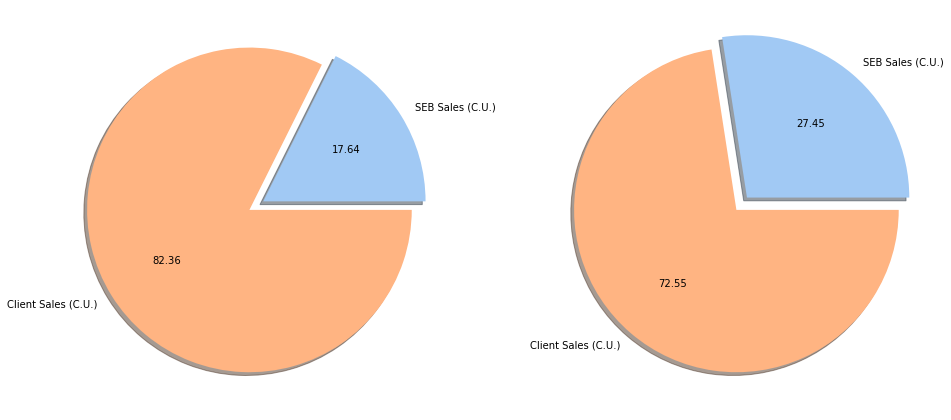

In [283]:
figure = plt.figure(figsize=(16, 9))

data_cat_1 = data[data["Category_Code"] == 1]
data_cat_2 = data[data["Category_Code"] == 2]

vals_cat_1 = [sum(data_cat_1['SEB Sales (C.U.)']), sum(data_cat_1['Client Sales (C.U.)'])]
vals_cat_2 = [sum(data_cat_2['SEB Sales (C.U.)']), sum(data_cat_2['Client Sales (C.U.)'])]

labels = ['SEB Sales (C.U.)', 'Client Sales (C.U.)']

build_pie(figure, 0, vals_cat_1, labels)
build_pie(figure, 1, vals_cat_2, labels)

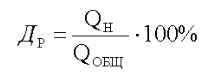

In [292]:
market_share_cat_1 = (sum(data_cat_1['SEB Sales (C.U.)']) / (sum(data_cat_1['Client Sales (C.U.)'])+sum(data_cat_1['SEB Sales (C.U.)'])))*100
market_share_cat_1

17.637652276321713

In [293]:
market_share_cat_2 = (sum(data_cat_2['SEB Sales (C.U.)']) / (sum(data_cat_2['Client Sales (C.U.)'])+sum(data_cat_2['SEB Sales (C.U.)'])))*100
market_share_cat_2

27.449966207362657

# conclusions
1. Sales for the beginning of 2020 are much higher than for 2019. In the first category at 2.22, in the second category at 2.42 times, judging by the median.
2. Client Sales correlates with SEB Sales.
3. In 2019, the median of the 1st category of goods differs from the median of the 2nd category by 11.8 times. In 2020, 10.84 times.

In [47]:
sum(data['SEB Sales (C.U.)']/data['Client Sales (C.U.)'])/data.shape[0]

0.2881465885147154

In [205]:
data.head()

,Year,Week,SEB Sales (C.U.),Client Sales (C.U.),Category_Code
0,2019,1,2113,12044,1
1,2020,1,3728,16436,1
2,2019,1,216,663,2
3,2020,1,420,1059,2
4,2019,2,2576,13772,1
